<a href="https://colab.research.google.com/github/ryali93/UNMSM_programacion/blob/master/jupyter/Repaso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [14]:
data = pd.read_excel("hidrobiologiaEATtiamaria.xlsx")
data.head()

,Nombre del punto,Este,Norte,Zona,Datum,Altitud,Comunidades identificadas,Descripción de ubicación
0,RTamb5,204853,8103600,19 Sur,WGS84,30,"Perifiton, macroinvertebrados bentónicos, nect...","Rio Tambo, a la altura del puente Freyre, apro..."
1,RTamb4,207797,8106922,19 Sur,WGS84,59,"Perifiton, macroinvertebrados bentónicos, nect...","Rio Tambo, aproximadamente 5 km aguas arriba d..."
2,RTamb7,231616,8115119,19 Sur,WGS84,370,"Perifiton, macroinvertebrados bentónicos","Rio Tambo, en la zona llamada Carrizal, aguas ..."
3,RTamb6,197967,8099495,19 Sur,WGS84,15,"Perifiton, macroinvertebrados bentónicos","Cerca de la desembocadura del rio Tambo, en el..."
4,RTamb3,209951,8112945,19 Sur,WGS84,97,"Perifiton, macroinvertebrados bentónicos","Rio Tambo, en la bocatoma de la junta de usuar..."


In [3]:
data[data["Altitud"] < 0]

,Nombre del punto,Este,Norte,Zona,Datum,Altitud,Comunidades identificadas,Descripción de ubicación
7,LlMej1,193667,8103432,19 Sur,WGS84,-4,"Macroinvertebrados bentónicos, fitoplancton, z...","En la laguna Mejia, cerca al mirador"
9,LINor1,194013,8103214,19 Sur,WGS84,-2,"Macroinvertebrados bentónicos, fitoplancton, z...",En el canal que abastece a la laguna Iberia no...
10,LISur1,195149,8101837,19 Sur,WGS84,-3,"Macroinvertebrados bentónicos, fitoplancton, z...",Laguna Iberia sur
12,LBoq1,196838,8100253,19 Sur,WGS84,-7,"Macroinvertebrados bentónicos, fitoplancton, z...",Laguna Boqueron
13,LICen1,194637,8102351,19 Sur,WGS84,-5,"Macroinvertebrados bentónicos, fitoplancton, z...",Orillas de la laguna Iberia centro


In [4]:
data["Comunidades identificadas"]

0     Perifiton, macroinvertebrados bentónicos, nect...
1     Perifiton, macroinvertebrados bentónicos, nect...
2              Perifiton, macroinvertebrados bentónicos
3              Perifiton, macroinvertebrados bentónicos
4              Perifiton, macroinvertebrados bentónicos
5              Perifiton, macroinvertebrados bentónicos
6              Perifiton, macroinvertebrados bentónicos
7     Macroinvertebrados bentónicos, fitoplancton, z...
8     Macroinvertebrados bentónicos, fitoplancton, z...
9     Macroinvertebrados bentónicos, fitoplancton, z...
10    Macroinvertebrados bentónicos, fitoplancton, z...
11    Macroinvertebrados bentónicos, fitoplancton, z...
12    Macroinvertebrados bentónicos, fitoplancton, z...
13    Macroinvertebrados bentónicos, fitoplancton, z...
Name: Comunidades identificadas, dtype: object

In [0]:
anita = "Anita lava la tina".split(" ")

In [13]:
print(anita)
if "no" in anita:
  print("Hola")

['Anita', 'lava', 'la', 'tina']


In [8]:
data["Comunidades identificadas"].str.split(", ")

0     [Perifiton, macroinvertebrados bentónicos, nec...
1     [Perifiton, macroinvertebrados bentónicos, nec...
2            [Perifiton, macroinvertebrados bentónicos]
3            [Perifiton, macroinvertebrados bentónicos]
4            [Perifiton, macroinvertebrados bentónicos]
5            [Perifiton, macroinvertebrados bentónicos]
6            [Perifiton, macroinvertebrados bentónicos]
7     [Macroinvertebrados bentónicos, fitoplancton, ...
8     [Macroinvertebrados bentónicos, fitoplancton, ...
9     [Macroinvertebrados bentónicos, fitoplancton, ...
10    [Macroinvertebrados bentónicos, fitoplancton, ...
11    [Macroinvertebrados bentónicos, fitoplancton, ...
12    [Macroinvertebrados bentónicos, fitoplancton, ...
13    [Macroinvertebrados bentónicos, fitoplancton, ...
Name: Comunidades identificadas, dtype: object

In [0]:
lista = []
for x in data["Comunidades identificadas"].str.split(", "):
    if "fitoplancton" in x:
        lista.append("Si")
    else:
        lista.append("No")

In [0]:
data["Fitoplancton"] = lista

In [20]:
data.head()

,Nombre del punto,Este,Norte,Zona,Datum,Altitud,Comunidades identificadas,Descripción de ubicación,Fitoplancton
0,RTamb5,204853,8103600,19 Sur,WGS84,30,"Perifiton, macroinvertebrados bentónicos, nect...","Rio Tambo, a la altura del puente Freyre, apro...",Si
1,RTamb4,207797,8106922,19 Sur,WGS84,59,"Perifiton, macroinvertebrados bentónicos, nect...","Rio Tambo, aproximadamente 5 km aguas arriba d...",Si
2,RTamb7,231616,8115119,19 Sur,WGS84,370,"Perifiton, macroinvertebrados bentónicos","Rio Tambo, en la zona llamada Carrizal, aguas ...",No
3,RTamb6,197967,8099495,19 Sur,WGS84,15,"Perifiton, macroinvertebrados bentónicos","Cerca de la desembocadura del rio Tambo, en el...",No
4,RTamb3,209951,8112945,19 Sur,WGS84,97,"Perifiton, macroinvertebrados bentónicos","Rio Tambo, en la bocatoma de la junta de usuar...",No


In [0]:
!pip install geopandas

In [0]:
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona

In [0]:
geometry = [Point(xy) for xy in zip(data.Este, data.Norte)]
crs = {'init': 'epsg:32719'} #https://www.spatialreference.org/ref/epsg/4326/

In [29]:
geo_df = GeoDataFrame(data, crs=crs, geometry=geometry)
geo_df.head()

,Nombre del punto,Este,Norte,Zona,Datum,Altitud,Comunidades identificadas,Descripción de ubicación,Fitoplancton,geometry
0,RTamb5,204853,8103600,19 Sur,WGS84,30,"Perifiton, macroinvertebrados bentónicos, nect...","Rio Tambo, a la altura del puente Freyre, apro...",Si,POINT (204853 8103600)
1,RTamb4,207797,8106922,19 Sur,WGS84,59,"Perifiton, macroinvertebrados bentónicos, nect...","Rio Tambo, aproximadamente 5 km aguas arriba d...",Si,POINT (207797 8106922)
2,RTamb7,231616,8115119,19 Sur,WGS84,370,"Perifiton, macroinvertebrados bentónicos","Rio Tambo, en la zona llamada Carrizal, aguas ...",No,POINT (231616 8115119)
3,RTamb6,197967,8099495,19 Sur,WGS84,15,"Perifiton, macroinvertebrados bentónicos","Cerca de la desembocadura del rio Tambo, en el...",No,POINT (197967 8099495)
4,RTamb3,209951,8112945,19 Sur,WGS84,97,"Perifiton, macroinvertebrados bentónicos","Rio Tambo, en la bocatoma de la junta de usuar...",No,POINT (209951 8112945)


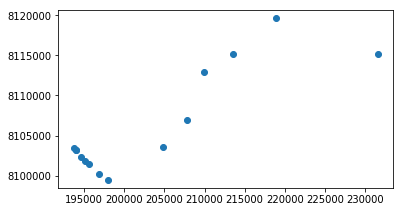

In [30]:
%matplotlib inline
geo_df.plot()

In [0]:
gjson = geo_df.to_crs(epsg='4326').to_json()

In [32]:
gjson

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"Altitud": 30, "Comunidades identificadas": "Perifiton, macroinvertebrados bent\\u00f3nicos, necton, fitoplancton, zooplancton", "Datum": "WGS84", "Descripci\\u00f3n de ubicaci\\u00f3n": "Rio Tambo, a la altura del puente Freyre, aproximadamente a 100 m de la bocatoma de la junta de usuarios de Punta de Bomb\\u00f3n", "Este": 204853, "Fitoplancton": "Si", "Nombre del punto": "RTamb5", "Norte": 8103600, "Zona": "19 Sur"}, "geometry": {"type": "Point", "coordinates": [-71.77387733294381, -17.133233473559454]}}, {"id": "1", "type": "Feature", "properties": {"Altitud": 59, "Comunidades identificadas": "Perifiton, macroinvertebrados bent\\u00f3nicos, necton, fitoplancton, zooplancton", "Datum": "WGS84", "Descripci\\u00f3n de ubicaci\\u00f3n": "Rio Tambo, aproximadamente 5 km aguas arriba del puente Freyre", "Este": 207797, "Fitoplancton": "Si", "Nombre del punto": "RTamb4", "Norte": 8106922, "Zona": "1

In [0]:
import folium

In [0]:
mapa = folium.Map([-17.135, -71.87], zoom_start=10, tiles='openstreetmap')
mapa

In [35]:
mapa = folium.Map([-17.135, -71.87], zoom_start=10, tiles='openstreetmap')
points = folium.features.GeoJson(gjson)
mapa.add_children(points)
mapa


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  after removing the cwd from sys.path.


In [0]:
import pandas as pd

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/ryali93/UNMSM_programacion/master/data/earthquakes.csv")
data.head()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
0,2002/01/01 10:39:06.82,-55.214,-129.000,10.0,6.0,Mw,78.0,NaN,NaN,1.07,NEI,2.002010e+11
1,2002/01/01 11:29:22.73,6.303,125.650,138.1,6.3,Mw,236.0,NaN,NaN,0.90,NEI,2.002010e+11
2,2002/01/02 14:50:33.49,-17.983,178.744,665.8,6.2,Mw,215.0,NaN,NaN,1.08,NEI,2.002010e+11
3,2002/01/02 17:22:48.76,-17.600,167.856,21.0,7.2,Mw,427.0,NaN,NaN,0.90,NEI,2.002010e+11
4,2002/01/03 07:05:27.67,36.088,70.687,129.3,6.2,Mw,431.0,NaN,NaN,0.87,NEI,2.002010e+11


In [0]:
import fiona
from shapely.geometry import Point
from geopandas import GeoDataFrame

In [0]:
geometria = [Point(xy) for xy in zip(data.Longitude, data.Latitude)]
CRS = {'init': 'epsg:4326'}

In [9]:
geo_df = GeoDataFrame(data, geometry=geometria, crs=CRS)
geo_df.head()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID,geometry
0,2002/01/01 10:39:06.82,-55.214,-129.000,10.0,6.0,Mw,78.0,NaN,NaN,1.07,NEI,2.002010e+11,POINT (-129 -55.214)
1,2002/01/01 11:29:22.73,6.303,125.650,138.1,6.3,Mw,236.0,NaN,NaN,0.90,NEI,2.002010e+11,POINT (125.65 6.303)
2,2002/01/02 14:50:33.49,-17.983,178.744,665.8,6.2,Mw,215.0,NaN,NaN,1.08,NEI,2.002010e+11,POINT (178.744 -17.983)
3,2002/01/02 17:22:48.76,-17.600,167.856,21.0,7.2,Mw,427.0,NaN,NaN,0.90,NEI,2.002010e+11,POINT (167.856 -17.6)
4,2002/01/03 07:05:27.67,36.088,70.687,129.3,6.2,Mw,431.0,NaN,NaN,0.87,NEI,2.002010e+11,POINT (70.687 36.088)


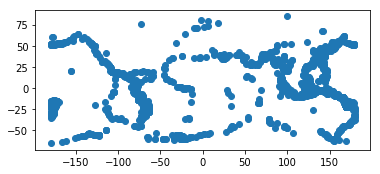

In [10]:
geo_df.plot()

In [0]:
terremotosSur = geo_df[(geo_df["Latitude"]<0) & (geo_df["Magnitude"]>7)]

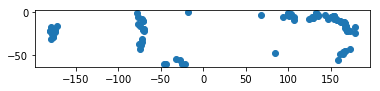

In [25]:
terremotosSur.plot()

In [0]:
gjson = terremotosSur.to_json()

In [0]:
import folium

In [57]:
MAPA = folium.Map([0,0], zoom_start=4, tiles="openstreetmap")
puntos = folium.features.GeoJson(gjson)
MAPA.add_children(puntos)
MAPA


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
def splitear(x):
   return x.split("/")

In [35]:
splitear("hola/mundo")

['hola', 'mundo']

In [36]:
geo_df["DateTime"][0]

'2002/01/01 10:39:06.82'

In [0]:
geo_df["DateTime"].apply(splitear)

In [46]:
lista = []
for x in geo_df["DateTime"].apply(splitear):
  if x[0] == "2006":
    lista.append("SI")
  else:
    lista.append("NO")
print(lista)

['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO

In [0]:
geo_df["Terr2006"] = lista

In [51]:
geo_df[(geo_df["Terr2006"]=="SI")  & (geo_df["Magnitude"]>7)]

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID,geometry,Terr2006
600,2006/01/02 06:10:49.76,-60.957,-21.606,13.0,7.4,Mw,271.0,NaN,NaN,1.28,NEI,2.006010e+11,POINT (-21.606 -60.957),SI
601,2006/01/02 22:13:40.49,-19.926,-178.178,582.9,7.2,Mw,646.0,NaN,NaN,1.11,NEI,2.006010e+11,POINT (-178.178 -19.926),SI
608,2006/01/27 16:58:53.67,-5.473,128.131,397.0,7.6,Mw,560.0,NaN,NaN,0.88,NEI,2.006013e+11,POINT (128.131 -5.473),SI
638,2006/04/20 23:25:02.15,60.949,167.089,22.0,7.6,Mw,579.0,NaN,NaN,0.87,NEI,2.006042e+11,POINT (167.089 60.949),SI
649,2006/05/03 15:26:40.29,-20.187,-174.123,55.0,8.0,Mw,626.0,NaN,NaN,1.18,NEI,2.006050e+11,POINT (-174.123 -20.187),SI
654,2006/05/16 10:39:23.34,-31.810,-179.307,152.0,7.4,Mw,613.0,NaN,NaN,1.32,NEI,2.006052e+11,POINT (-179.307 -31.81),SI
680,2006/07/17 08:19:26.68,-9.284,107.419,20.0,7.7,Mw,357.0,NaN,NaN,1.16,NEI,2.006072e+11,POINT (107.419 -9.284000000000001),SI
728,2006/11/15 11:14:13.57,46.592,153.266,10.0,8.3,Mw,576.0,NaN,NaN,1.07,NEI,2.006112e+11,POINT (153.266 46.592),SI
748,2006/12/26 12:26:21.14,21.799,120.547,10.0,7.1,Mw,744.0,NaN,NaN,1.00,NEI,2.006123e+11,POINT (120.547 21.799),SI
